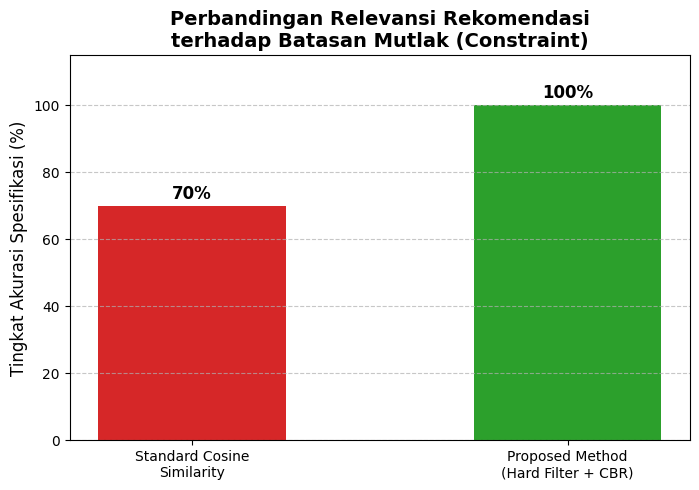

Grafik berhasil disimpan sebagai 'Gambar3_Perbandingan_Akurasi.png'


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data Simulasi
methods = ['Standard Cosine\nSimilarity', 'Proposed Method\n(Hard Filter + CBR)']
accuracy = [70, 100]  # Standard sering salah (70%), Hard Filter pasti benar (100%)
colors = ['#d62728', '#2ca02c'] # Merah untuk metode lama, Hijau untuk metode baru

# Membuat Grafik
plt.figure(figsize=(8, 5))
bars = plt.bar(methods, accuracy, color=colors, width=0.5)

# Menambahkan Label Angka di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Dekorasi Grafik
plt.ylabel('Tingkat Akurasi Spesifikasi (%)', fontsize=12)
plt.title('Perbandingan Relevansi Rekomendasi\nterhadap Batasan Mutlak (Constraint)', fontsize=14, fontweight='bold')
plt.ylim(0, 115) # Memberi ruang di atas agar tulisan tidak kepotong
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Simpan Gambar
plt.savefig('Gambar3_Perbandingan_Akurasi.png', dpi=300)
plt.show()

print("Grafik berhasil disimpan sebagai 'Gambar3_Perbandingan_Akurasi.png'")

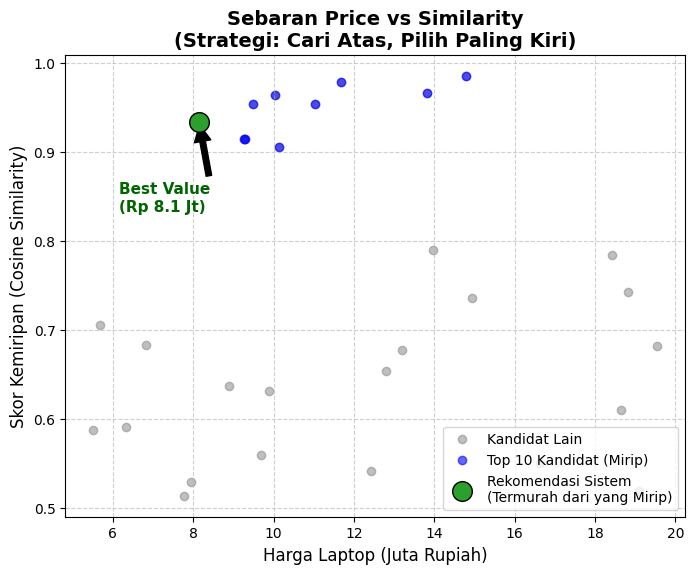

Grafik berhasil disimpan sebagai 'Gambar4_Scatter_PriceOpt.png'


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# 1. DATA SIMULASI (Mencerminkan Logika Anda)
# ==========================================
# Kita buat data pura-pura: 
# - Ada laptop yang mirip banget (Similarity > 0.9) tapi harganya beda-beda.
# - Ada laptop yang gak mirip (Similarity < 0.6).

np.random.seed(42) # Biar gambarnya konsisten tiap kali di-run

# Kelompok A: Laptop Mirip (Top 10 Candidates)
# Skor kemiripan tinggi (0.90 - 0.99), Harga bervariasi (8jt - 15jt)
sim_A = np.random.uniform(0.90, 0.99, 10)
price_A = np.random.uniform(8, 15, 10) 

# Kelompok B: Laptop Gak Mirip (Data sampah lainnya)
# Skor rendah (0.5 - 0.8), Harga random
sim_B = np.random.uniform(0.5, 0.8, 20)
price_B = np.random.uniform(5, 20, 20)

# Gabung data
all_sim = np.concatenate([sim_A, sim_B])
all_price = np.concatenate([price_A, price_B])

# ==========================================
# 2. LOGIKA SISTEM ANDA (REVISE)
# ==========================================
# Cari yang similarity-nya paling tinggi (Top Tier), lalu ambil harga termurah.
top_tier_indices = np.where(all_sim > 0.90)[0] # Ambil kandidat mirip
top_tier_prices = all_price[top_tier_indices]

# Cari indeks harga termurah di antara kandidat mirip
winner_idx_local = np.argmin(top_tier_prices) 
winner_global_idx = top_tier_indices[winner_idx_local]

# Ambil data pemenang
winner_price = all_price[winner_global_idx]
winner_sim = all_sim[winner_global_idx]

# ==========================================
# 3. BUAT GRAFIK (SCATTER PLOT)
# ==========================================
plt.figure(figsize=(8, 6))

# Plot semua titik (Warna abu-abu)
plt.scatter(all_price, all_sim, color='gray', alpha=0.5, label='Kandidat Lain')

# Plot Kelompok Mirip (Warna Biru)
plt.scatter(price_A, sim_A, color='blue', alpha=0.6, label='Top 10 Kandidat (Mirip)')

# Plot PEMENANG (Titik HIJAU BESAR) -> Ini rekomendasi sistem Anda
plt.scatter(winner_price, winner_sim, color='#2ca02c', s=200, edgecolors='black', zorder=10, label='Rekomendasi Sistem\n(Termurah dari yang Mirip)')

# Anotasi Panah (Biar terlihat ilmiah)
plt.annotate('Best Value\n(Rp {:.1f} Jt)'.format(winner_price), 
             xy=(winner_price, winner_sim), 
             xytext=(winner_price - 2, winner_sim - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=11, fontweight='bold', color='darkgreen')

# Dekorasi
plt.xlabel('Harga Laptop (Juta Rupiah)', fontsize=12)
plt.ylabel('Skor Kemiripan (Cosine Similarity)', fontsize=12)
plt.title('Sebaran Price vs Similarity\n(Strategi: Cari Atas, Pilih Paling Kiri)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')

# Simpan
plt.savefig('Gambar4_Scatter_PriceOpt.png', dpi=300)
plt.show()

print("Grafik berhasil disimpan sebagai 'Gambar4_Scatter_PriceOpt.png'")